<a href="https://colab.research.google.com/github/svishnupriya1999/Machine-learning-Project/blob/main/Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CROP RECOMMENDATION**

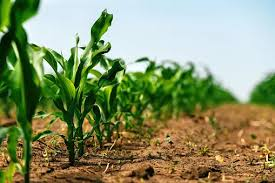

# **Importing Sufficient Libraries**



In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data fields**

*  N - ratio of Nitrogen content in soil - kg/ha

*  P - ratio of Phosphorous content in soil - kg/ha

*  K - ratio of Potassium content in soil - kg/ha

*  temperature - temperature in degree Celsius

*  humidity - relative humidity in %

*  ph - ph value of the soil

*  rainfall - rainfall in mm

# **Read data**

In [159]:
df=pd.read_csv('/content/crop file project.csv')
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# **Data preprocessing**

In [160]:
#Columns heading
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [161]:
#first 5 observation
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [162]:
#last 5 observations
df.tail()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [163]:
#number of rows and columns
df.shape

(2200, 8)

In [164]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2036 non-null   float64
 5   ph           1570 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [165]:
#number of duplicate values
df.duplicated().sum()

0

In [166]:
#To find missing values
df.isna().sum()

Nitrogen         0
phosphorus       0
potassium        0
temperature      0
humidity       164
ph             630
rainfall         0
label            0
dtype: int64

In [167]:
hum_mean=df['humidity'].mean()
hum_mean

73.58769343563851

In [168]:
df['humidity'].fillna(hum_mean,inplace=True)
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [169]:
ph_mean=df['ph'].mean()
ph_mean

6.491031520764332

In [170]:
df['ph'].fillna(ph_mean,inplace=True)
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [171]:
#missing values
df.isna().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [172]:
#describe the data
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,73.587693,6.491032,103.463655
std,36.917334,32.985883,50.647931,5.063749,20.669469,0.509630,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,4.507524,20.211267
25%,21.000000,28.000000,20.000000,22.769375,64.148965,6.231878,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.491032,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.711699,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,7.995849,298.560117


In [173]:
df.nunique()

Nitrogen        137
phosphorus      117
potassium        73
temperature    2200
humidity       2037
ph             1571
rainfall       2200
label            22
dtype: int64

In [174]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [175]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [176]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [177]:
df.corr()

<ipython-input-177-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.122932,0.111703,0.059020
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.094459,-0.183232,-0.063839
potassium,-0.140512,0.736232,1.000000,-0.160387,0.149270,-0.365411,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.227126,-0.023602,-0.030084
humidity,0.122932,-0.094459,0.149270,0.227126,1.000000,-0.037645,0.132878
ph,0.111703,-0.183232,-0.365411,-0.023602,-0.037645,1.000000,-0.040361
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.132878,-0.040361,1.000000


<ipython-input-178-8df7bcac526d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

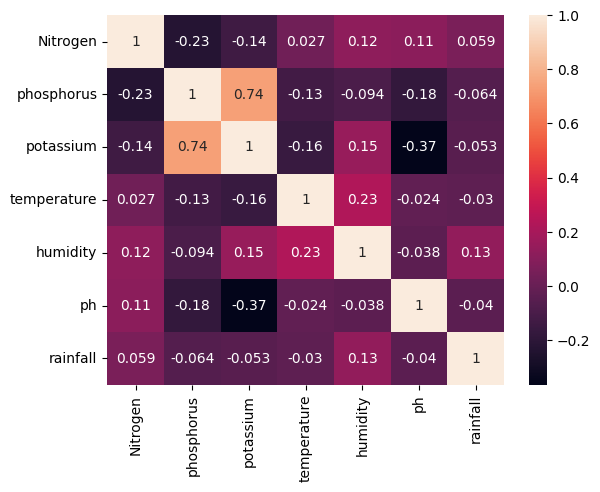

In [178]:
sns.heatmap(df.corr(),annot=True)

In [179]:
columns = df.columns[:-1]
columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall'],
      dtype='object')

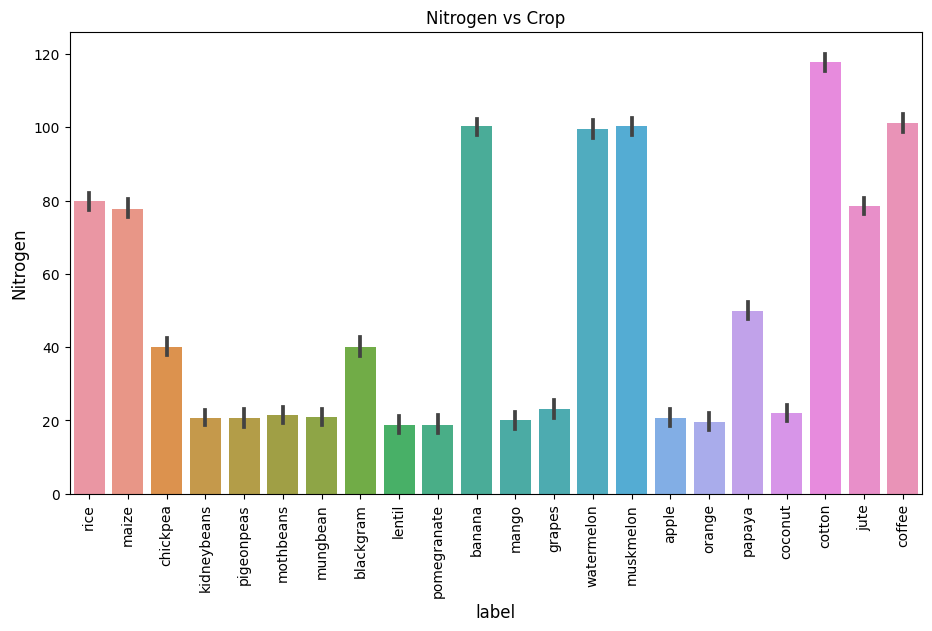

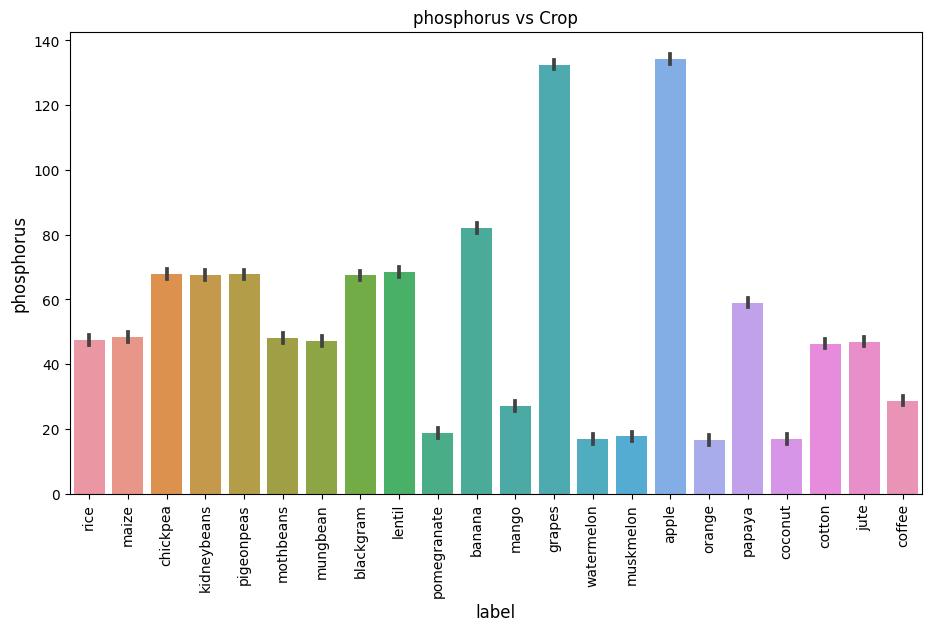

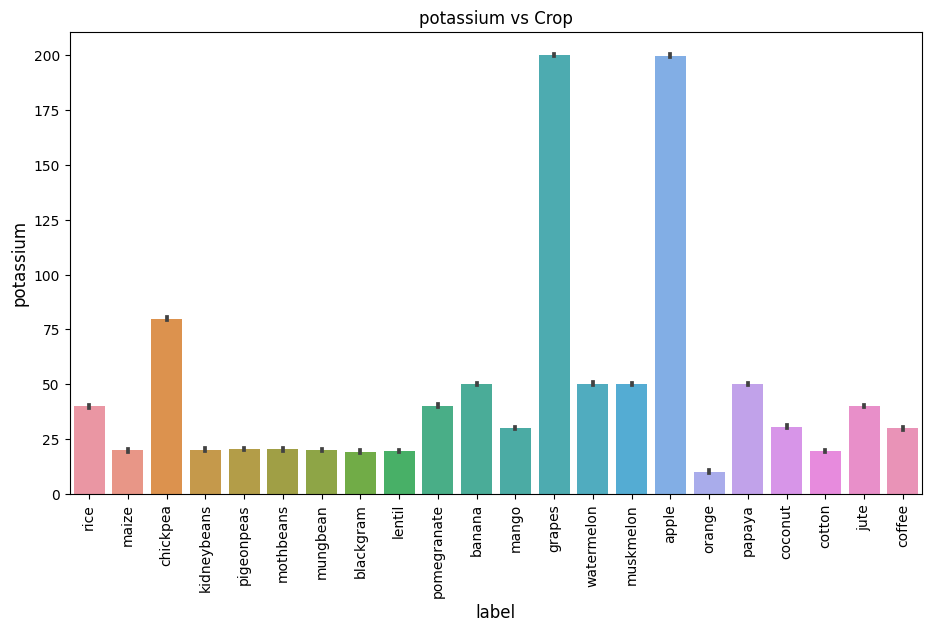

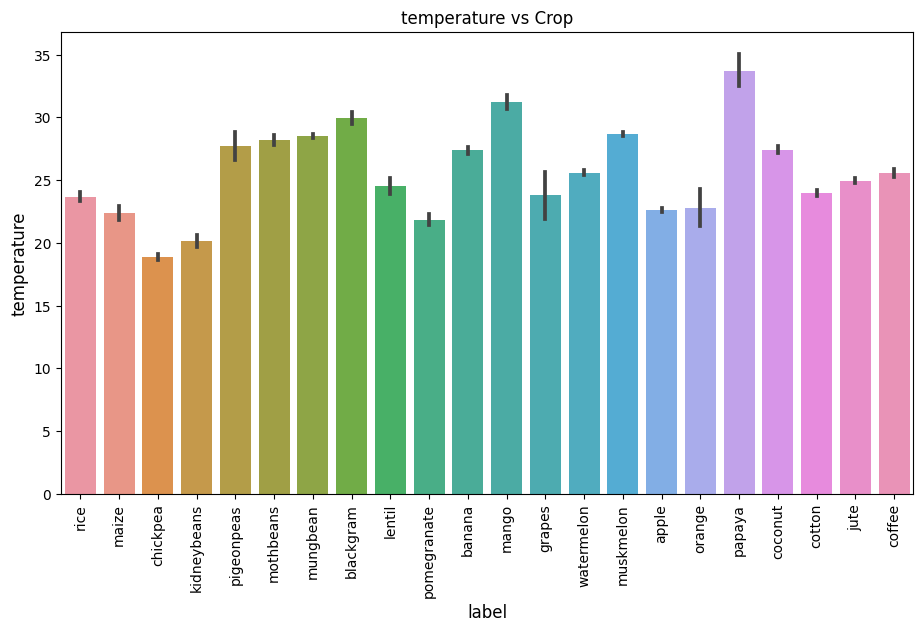

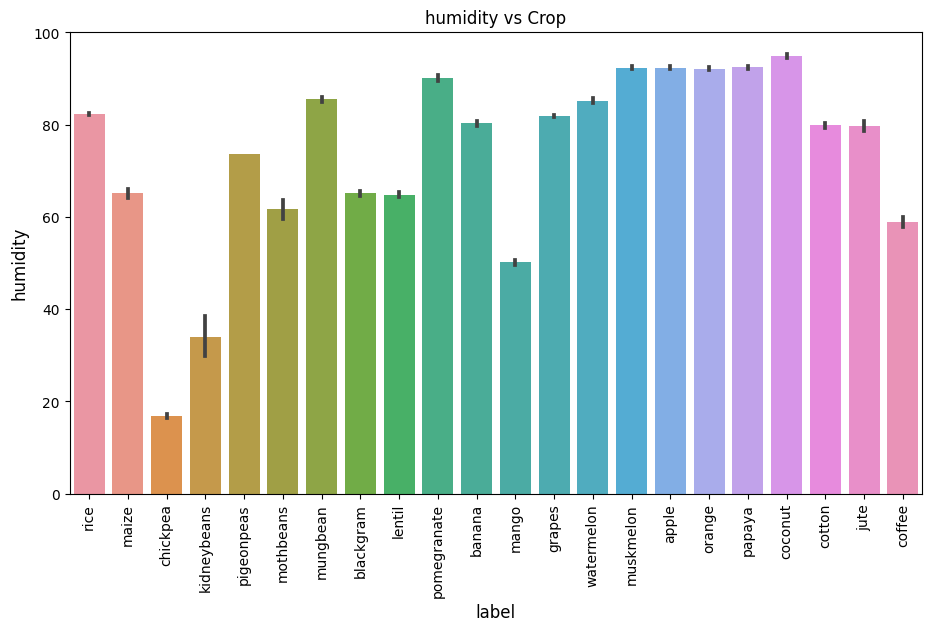

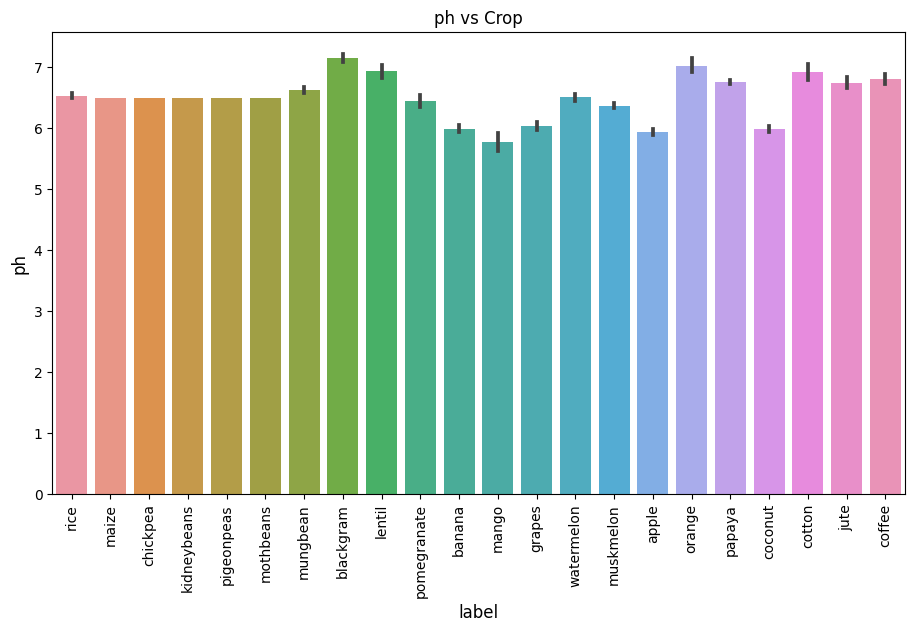

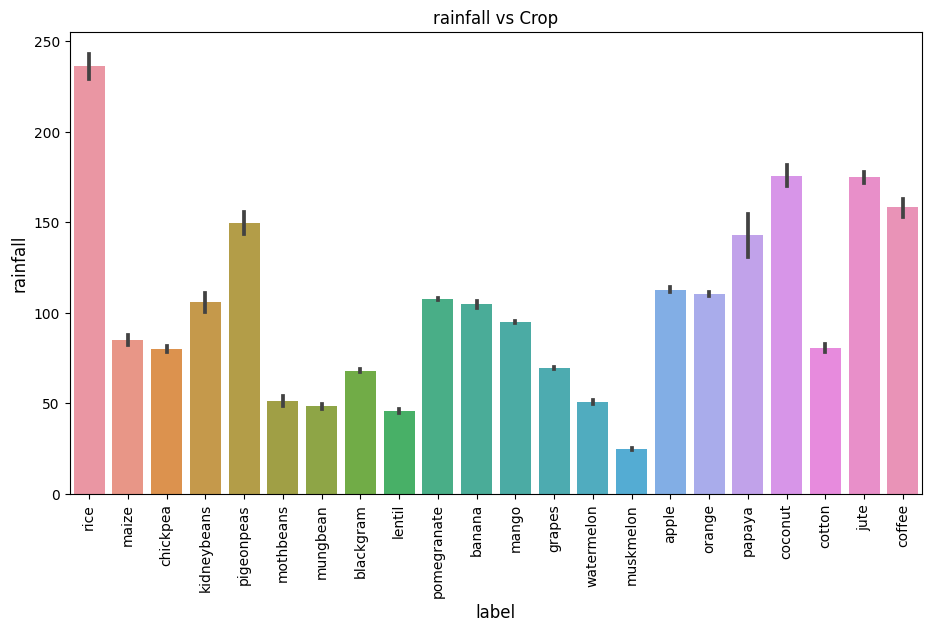

In [180]:
for column in columns:
  plt.figure(figsize = (11,6))
  sns.barplot(x = 'label', y = column, data = df)
  plt.xlabel('label',fontsize =12)
  plt.ylabel(column,fontsize = 12)
  plt.xticks(rotation=90)
  plt.title(f'{column} vs Crop')
  plt.show()

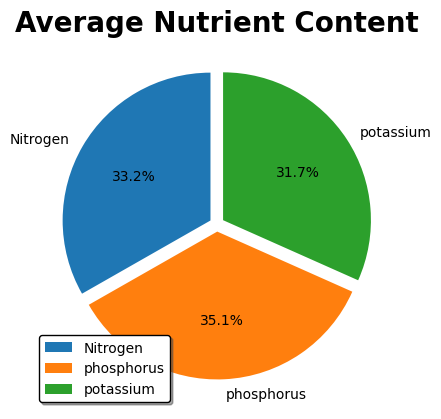

In [181]:
nutrients=['Nitrogen','phosphorus','potassium']
sizes=[df['Nitrogen'].mean(),df['phosphorus'].mean(),df['potassium'].mean()]
explode=[0.05,0.05,0.05]
plt.pie(sizes,labels=nutrients,autopct='%1.1f%%' ,startangle=90,explode=explode)
plt.title('Average Nutrient Content',fontsize=20,fontweight='bold')
plt.legend(fontsize=10,loc='best',frameon=True,edgecolor='black',shadow=True)
plt.show()

In [182]:
import plotly.express as px

In [183]:
fig = px.box(df,y='Nitrogen',points='all')
fig.show()

In [184]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [185]:
fig = px.box(df,y='phosphorus',points='all')
fig.show()

In [186]:
fig = px.box(df,y='potassium',points='all')
fig.show()

In [187]:
fig = px.box(df,y='temperature',points='all')
fig.show()

In [188]:
fig = px.box(df,y='humidity',points='all')
fig.show()

In [189]:
fig = px.box(df,y='ph',points='all')
fig.show()

In [190]:
fig = px.box(df,y='rainfall',points='all')
fig.show()

In [191]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [192]:
#Detect and remove outliers

def remove_outliers_iqr(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Columns to consider for outlier removal
columns_to_check = ['Nitrogen','phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall','label']

# Remove outliers
df_cleaned = remove_outliers_iqr(df[columns_to_check])

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)



Original shape: (2200, 8)
Cleaned shape: (1527, 8)


<ipython-input-192-8bd5a153879c>:4: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-192-8bd5a153879c>:5: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-192-8bd5a153879c>:11: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [193]:
#input data
x=df_cleaned.iloc[:,:-1].values
x

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 93.        ,  56.        ,  36.        , ...,  82.05687182,
          6.49103152, 185.2773389 ],
       [ 94.        ,  50.        ,  37.        , ...,  80.66385045,
          6.49103152, 209.5869708 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [194]:
#output data
y=df_cleaned.iloc[:,-1].values
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

In [195]:
#spliting data into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 71.        ,  60.        ,  22.        , ...,  59.37147589,
          6.49103152,  85.75692395],
       [  2.        ,  56.        ,  23.        , ...,  59.79023382,
          6.49103152,  36.91852635],
       [  6.        ,  36.        ,  22.        , ...,  73.58769344,
          6.49103152,  42.24783476],
       ...,
       [ 22.        ,  18.        ,  31.        , ...,  47.93791463,
          5.95602706,  90.38503469],
       [111.        ,  27.        ,  31.        , ...,  55.27564977,
          6.04333095, 191.3980675 ],
       [ 34.        ,  65.        ,  47.        , ...,  93.71043692,
          6.83376853, 191.7760562 ]])

In [196]:
x_test

array([[ 67.        ,  55.        ,  44.        , ...,  75.14640198,
          7.2518473 , 182.2685447 ],
       [ 69.        ,  51.        ,  23.        , ...,  72.85462807,
          6.49103152, 106.6213157 ],
       [ 95.        ,  23.        ,  45.        , ...,  90.56698742,
          6.26620873,  21.19014526],
       ...,
       [ 22.        ,  44.        ,  24.        , ...,  73.58769344,
          6.49103152,  58.99536268],
       [ 86.        ,  31.        ,  35.        , ...,  60.76645256,
          6.48576142, 191.4508931 ],
       [103.        ,  40.        ,  30.        , ...,  55.196224  ,
          6.34831626, 141.4831644 ]])

In [197]:
y_train

array(['maize', 'mothbeans', 'mothbeans', ..., 'mango', 'coffee',
       'papaya'], dtype=object)

In [198]:
y_test

array(['jute', 'maize', 'muskmelon', 'pomegranate', 'papaya', 'muskmelon',
       'coffee', 'coffee', 'coffee', 'coconut', 'coffee', 'pomegranate',
       'mungbean', 'coffee', 'blackgram', 'pomegranate', 'orange', 'rice',
       'maize', 'pigeonpeas', 'mungbean', 'mothbeans', 'maize', 'lentil',
       'coffee', 'maize', 'orange', 'muskmelon', 'orange', 'coffee',
       'lentil', 'mothbeans', 'coffee', 'watermelon', 'mango',
       'pomegranate', 'orange', 'jute', 'blackgram', 'blackgram', 'jute',
       'watermelon', 'cotton', 'lentil', 'mothbeans', 'mothbeans',
       'maize', 'jute', 'orange', 'cotton', 'mothbeans', 'mungbean',
       'mothbeans', 'mothbeans', 'mothbeans', 'coffee', 'maize', 'coffee',
       'banana', 'papaya', 'banana', 'cotton', 'rice', 'muskmelon',
       'mungbean', 'muskmelon', 'pomegranate', 'muskmelon', 'cotton',
       'pigeonpeas', 'cotton', 'mungbean', 'mothbeans', 'muskmelon',
       'pigeonpeas', 'watermelon', 'banana', 'blackgram', 'cotton',
       'mai

In [199]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[ 0.39158437,  0.733991  , -0.70621749, ..., -1.35483918,
        -0.04328582, -0.258858  ],
       [-1.38892007,  0.55490542, -0.63055892, ..., -1.32337059,
        -0.04328582, -1.2176578 ],
       [-1.28570242, -0.34052253, -0.70621749, ..., -0.28652671,
        -0.04328582, -1.11303234],
       ...,
       [-0.87283182, -1.14640768, -0.02529036, ..., -2.21404213,
        -1.41280735, -0.16799852],
       [ 1.42376085, -0.7434651 , -0.02529036, ..., -1.66263006,
        -1.18932406,  1.81509839],
       [-0.56317888,  0.95784799,  1.18524675, ...,  1.22564611,
         0.83406334,  1.8225191 ]])

In [200]:
x_test

array([[ 0.24925344,  0.59877522,  1.01386369, ..., -0.13313054,
         1.8434822 ,  1.69408008],
       [ 0.30041951,  0.4138549 , -0.55704647, ..., -0.30128719,
        -0.03128711,  0.21737779],
       [ 0.96557839, -0.88058734,  1.08866893, ...,  0.99833964,
        -0.58528571, -1.45031589],
       ...,
       [-0.9019831 ,  0.09024434, -0.48224122, ..., -0.24749924,
        -0.03128711, -0.71232387],
       [ 0.73533109, -0.5107467 ,  0.34061648, ..., -1.18824509,
        -0.04427347,  1.87332782],
       [ 1.17024267, -0.09467598, -0.03340975, ..., -1.5969551 ,
        -0.38295989,  0.89791259]])

### **MODEL CREATION** & **PERFORMANCE EVALUATION**

In [201]:
#KNearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=7)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

array(['jute', 'maize', 'muskmelon', 'pomegranate', 'papaya', 'muskmelon',
       'coffee', 'coffee', 'coffee', 'coconut', 'coffee', 'pomegranate',
       'mungbean', 'coffee', 'blackgram', 'pomegranate', 'orange', 'jute',
       'maize', 'pigeonpeas', 'mungbean', 'mothbeans', 'maize',
       'kidneybeans', 'coffee', 'cotton', 'orange', 'muskmelon', 'orange',
       'coffee', 'blackgram', 'mothbeans', 'coffee', 'watermelon',
       'mango', 'pomegranate', 'orange', 'rice', 'blackgram', 'blackgram',
       'jute', 'watermelon', 'cotton', 'lentil', 'mothbeans', 'mothbeans',
       'maize', 'jute', 'orange', 'cotton', 'mothbeans', 'mungbean',
       'mothbeans', 'mothbeans', 'mothbeans', 'coffee', 'maize', 'coffee',
       'banana', 'papaya', 'banana', 'cotton', 'rice', 'muskmelon',
       'mungbean', 'muskmelon', 'pomegranate', 'muskmelon', 'cotton',
       'pigeonpeas', 'cotton', 'mungbean', 'mothbeans', 'muskmelon',
       'pigeonpeas', 'watermelon', 'banana', 'blackgram', 'cotton',
  

In [202]:
y_test

array(['jute', 'maize', 'muskmelon', 'pomegranate', 'papaya', 'muskmelon',
       'coffee', 'coffee', 'coffee', 'coconut', 'coffee', 'pomegranate',
       'mungbean', 'coffee', 'blackgram', 'pomegranate', 'orange', 'rice',
       'maize', 'pigeonpeas', 'mungbean', 'mothbeans', 'maize', 'lentil',
       'coffee', 'maize', 'orange', 'muskmelon', 'orange', 'coffee',
       'lentil', 'mothbeans', 'coffee', 'watermelon', 'mango',
       'pomegranate', 'orange', 'jute', 'blackgram', 'blackgram', 'jute',
       'watermelon', 'cotton', 'lentil', 'mothbeans', 'mothbeans',
       'maize', 'jute', 'orange', 'cotton', 'mothbeans', 'mungbean',
       'mothbeans', 'mothbeans', 'mothbeans', 'coffee', 'maize', 'coffee',
       'banana', 'papaya', 'banana', 'cotton', 'rice', 'muskmelon',
       'mungbean', 'muskmelon', 'pomegranate', 'muskmelon', 'cotton',
       'pigeonpeas', 'cotton', 'mungbean', 'mothbeans', 'muskmelon',
       'pigeonpeas', 'watermelon', 'banana', 'blackgram', 'cotton',
       'mai

accuracy score is 0.9586056644880174
classification report is               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        24
   blackgram       0.78      0.95      0.86        22
     coconut       1.00      1.00      1.00        25
      coffee       1.00      0.97      0.99        37
      cotton       0.96      1.00      0.98        23
        jute       0.92      0.89      0.91        27
 kidneybeans       0.00      0.00      0.00         2
      lentil       0.96      0.79      0.86        28
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.97      0.99        34
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      0.97      0.99        37
      orange       1.00      1.00      1.00        19
      papaya       1.00      1.00      1.00        15
  pigeonpeas       0.92      0.92      0.92        26
 pomegranate       

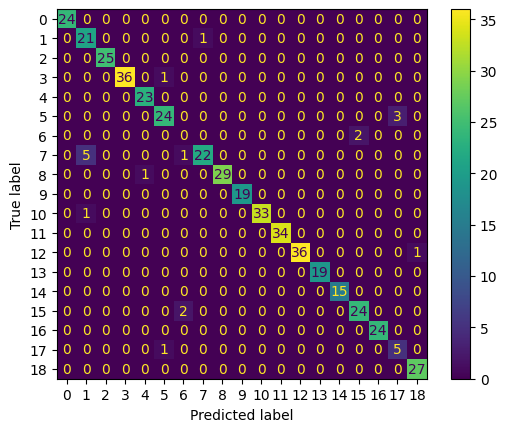

In [203]:
#Performance Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
score1=accuracy_score(y_test,y_pred1)
print("accuracy score is",score1)
report1=classification_report(y_test,y_pred1)
print("classification report is",report1)
result1=confusion_matrix(y_test,y_pred1)
cmd=ConfusionMatrixDisplay(result1)
cmd.plot()



In [204]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array(['jute', 'cotton', 'muskmelon', 'pomegranate', 'papaya',
       'muskmelon', 'coffee', 'coffee', 'coffee', 'coconut', 'coffee',
       'pomegranate', 'mungbean', 'coffee', 'blackgram', 'pomegranate',
       'orange', 'rice', 'blackgram', 'coffee', 'mungbean', 'lentil',
       'cotton', 'lentil', 'coffee', 'cotton', 'orange', 'muskmelon',
       'orange', 'coffee', 'lentil', 'lentil', 'coffee', 'watermelon',
       'mango', 'pomegranate', 'orange', 'jute', 'blackgram', 'blackgram',
       'jute', 'watermelon', 'cotton', 'lentil', 'blackgram', 'blackgram',
       'cotton', 'jute', 'orange', 'cotton', 'mungbean', 'mungbean',
       'lentil', 'mango', 'lentil', 'coffee', 'blackgram', 'coffee',
       'banana', 'papaya', 'banana', 'cotton', 'rice', 'muskmelon',
       'mungbean', 'muskmelon', 'pomegranate', 'muskmelon', 'cotton',
       'blackgram', 'cotton', 'mungbean', 'lentil', 'muskmelon', 'jute',
       'watermelon', 'banana', 'blackgram', 'cotton', 'cotton', 'jute',
       'mang

accuracy score is 0.7995642701525054
classification report is               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        24
   blackgram       0.43      1.00      0.60        22
     coconut       0.89      1.00      0.94        25
      coffee       0.73      1.00      0.84        37
      cotton       0.66      1.00      0.79        23
        jute       0.68      1.00      0.81        27
 kidneybeans       0.00      0.00      0.00         2
      lentil       0.67      1.00      0.80        28
       maize       0.00      0.00      0.00        30
       mango       0.90      1.00      0.95        19
   mothbeans       0.00      0.00      0.00        34
    mungbean       0.92      1.00      0.96        34
   muskmelon       1.00      1.00      1.00        37
      orange       1.00      1.00      1.00        19
      papaya       1.00      1.00      1.00        15
  pigeonpeas       0.00      0.00      0.00        26
 pomegranate       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



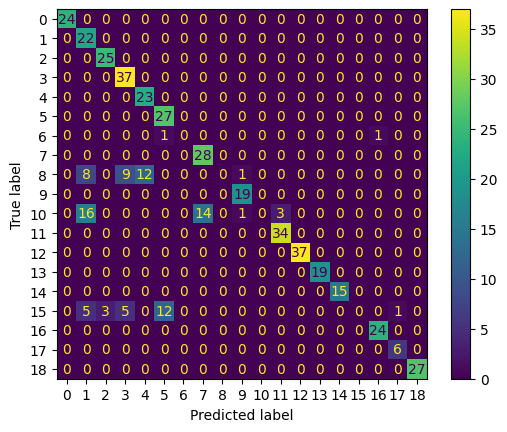

In [205]:
#performance evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
score2=accuracy_score(y_test,y_pred2)
print("accuracy score is",score2)
report2=classification_report(y_test,y_pred2)
print("classification report is",report2)
result2=confusion_matrix(y_test,y_pred2)
cmd=ConfusionMatrixDisplay(result2)
cmd.plot()

In [206]:
#SVC
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
y_pred3

array(['jute', 'maize', 'muskmelon', 'pomegranate', 'papaya', 'muskmelon',
       'coffee', 'coffee', 'coffee', 'coconut', 'coffee', 'pomegranate',
       'mungbean', 'coffee', 'blackgram', 'pomegranate', 'orange', 'jute',
       'maize', 'pigeonpeas', 'mungbean', 'mothbeans', 'maize',
       'kidneybeans', 'coffee', 'maize', 'orange', 'muskmelon', 'orange',
       'coffee', 'blackgram', 'mothbeans', 'coffee', 'watermelon',
       'mango', 'pomegranate', 'orange', 'rice', 'blackgram', 'blackgram',
       'jute', 'watermelon', 'cotton', 'lentil', 'mothbeans', 'mothbeans',
       'maize', 'jute', 'orange', 'cotton', 'mothbeans', 'mungbean',
       'mothbeans', 'mothbeans', 'mothbeans', 'coffee', 'maize', 'coffee',
       'banana', 'papaya', 'banana', 'cotton', 'jute', 'muskmelon',
       'mungbean', 'muskmelon', 'pomegranate', 'muskmelon', 'cotton',
       'pigeonpeas', 'cotton', 'mungbean', 'mothbeans', 'muskmelon',
       'pigeonpeas', 'watermelon', 'banana', 'blackgram', 'cotton',
   

accuracy score is 0.9782135076252724
classification report is               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        24
   blackgram       0.92      1.00      0.96        22
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        23
        jute       0.89      0.89      0.89        27
 kidneybeans       0.50      0.50      0.50         2
      lentil       1.00      0.89      0.94        28
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        37
      orange       1.00      1.00      1.00        19
      papaya       1.00      1.00      1.00        15
  pigeonpeas       0.96      1.00      0.98        26
 pomegranate       

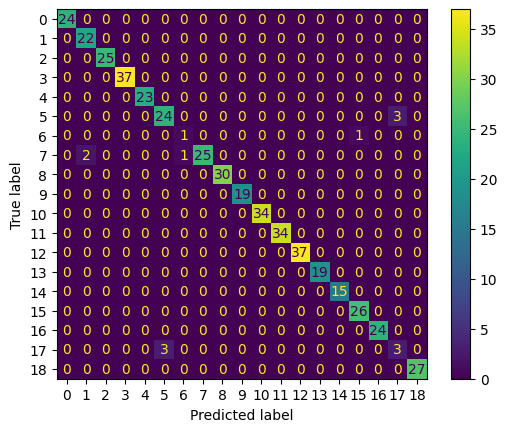

In [207]:
#performance evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
score3=accuracy_score(y_test,y_pred3)
print("accuracy score is",score3)
report3=classification_report(y_test,y_pred3)
print("classification report is",report3)
result3=confusion_matrix(y_test,y_pred3)
cmd=ConfusionMatrixDisplay(result3)
cmd.plot()

In [208]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(criterion='entropy')
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4

array(['jute', 'maize', 'muskmelon', 'pomegranate', 'papaya', 'muskmelon',
       'coffee', 'coffee', 'coffee', 'coconut', 'coffee', 'pomegranate',
       'mungbean', 'coffee', 'blackgram', 'pomegranate', 'orange', 'jute',
       'maize', 'pigeonpeas', 'mungbean', 'lentil', 'maize', 'lentil',
       'coffee', 'maize', 'orange', 'muskmelon', 'orange', 'coffee',
       'lentil', 'lentil', 'coffee', 'watermelon', 'mango', 'pomegranate',
       'orange', 'jute', 'blackgram', 'blackgram', 'jute', 'watermelon',
       'cotton', 'lentil', 'blackgram', 'blackgram', 'maize', 'jute',
       'orange', 'cotton', 'mango', 'mungbean', 'lentil', 'blackgram',
       'blackgram', 'coffee', 'maize', 'coffee', 'banana', 'papaya',
       'banana', 'cotton', 'rice', 'muskmelon', 'mungbean', 'muskmelon',
       'pomegranate', 'muskmelon', 'cotton', 'pigeonpeas', 'cotton',
       'mungbean', 'lentil', 'muskmelon', 'pigeonpeas', 'watermelon',
       'banana', 'blackgram', 'cotton', 'maize', 'jute', 'mango',
 

accuracy score is 0.8910675381263616
classification report is               precision    recall  f1-score   support

      banana       0.89      1.00      0.94        24
   blackgram       0.46      0.82      0.59        22
     coconut       1.00      1.00      1.00        25
      coffee       1.00      0.95      0.97        37
      cotton       1.00      1.00      1.00        23
        jute       0.90      0.96      0.93        27
 kidneybeans       0.00      0.00      0.00         2
      lentil       0.68      0.89      0.77        28
       maize       1.00      1.00      1.00        30
       mango       0.86      1.00      0.93        19
   mothbeans       0.00      0.00      0.00        34
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        37
      orange       1.00      1.00      1.00        19
      papaya       1.00      0.80      0.89        15
  pigeonpeas       0.79      1.00      0.88        26
 pomegranate       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



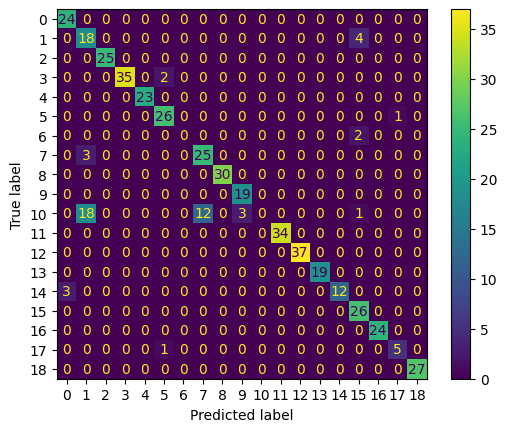

In [209]:
#performance evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
score4=accuracy_score(y_test,y_pred4)
print("accuracy score is",score4)
report4=classification_report(y_test,y_pred4)
print("classification report is",report4)
result4=confusion_matrix(y_test,y_pred4)
cmd=ConfusionMatrixDisplay(result4)
cmd.plot()

In [210]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(n_estimators=50,random_state=42)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
y_pred5

array(['jute', 'maize', 'muskmelon', 'pomegranate', 'papaya', 'muskmelon',
       'coffee', 'coffee', 'coffee', 'coconut', 'coffee', 'pomegranate',
       'mungbean', 'coffee', 'blackgram', 'pomegranate', 'orange', 'jute',
       'maize', 'pigeonpeas', 'mungbean', 'lentil', 'maize', 'lentil',
       'coffee', 'cotton', 'orange', 'muskmelon', 'orange', 'coffee',
       'lentil', 'mothbeans', 'coffee', 'watermelon', 'mango',
       'pomegranate', 'orange', 'jute', 'blackgram', 'blackgram', 'jute',
       'watermelon', 'cotton', 'lentil', 'mothbeans', 'mothbeans',
       'maize', 'jute', 'orange', 'cotton', 'mothbeans', 'mungbean',
       'mothbeans', 'mothbeans', 'mothbeans', 'coffee', 'maize', 'coffee',
       'banana', 'papaya', 'banana', 'cotton', 'rice', 'muskmelon',
       'mungbean', 'muskmelon', 'pomegranate', 'muskmelon', 'cotton',
       'pigeonpeas', 'cotton', 'mungbean', 'mothbeans', 'muskmelon',
       'pigeonpeas', 'watermelon', 'banana', 'blackgram', 'cotton',
       'maize

accuracy score is 0.9869281045751634
classification report is               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        37
      cotton       0.96      1.00      0.98        23
        jute       0.96      0.96      0.96        27
 kidneybeans       1.00      0.50      0.67         2
      lentil       0.93      1.00      0.97        28
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        37
      orange       1.00      1.00      1.00        19
      papaya       1.00      1.00      1.00        15
  pigeonpeas       0.96      1.00      0.98        26
 pomegranate       

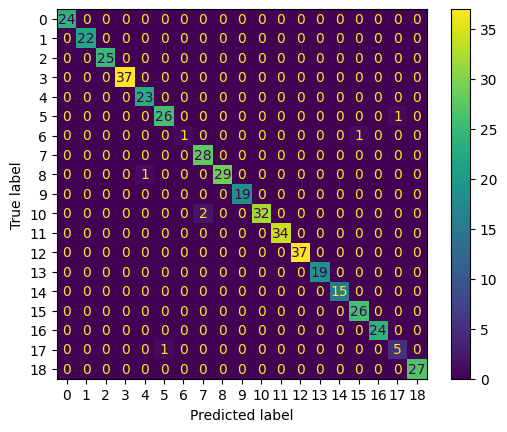

In [211]:
#performance evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
score5=accuracy_score(y_test,y_pred5)
print("accuracy score is",score5)
report5=classification_report(y_test,y_pred5)
print("classification report is",report5)
result5=confusion_matrix(y_test,y_pred5)
cmd=ConfusionMatrixDisplay(result5)
cmd.plot()

In [212]:
#model with good accuracy
scores=[score1,score2,score3,score4,score5]
algorithms=["KNN","Naive Bayes","SVC","Decision Tree","Random Forest"]
table=pd.DataFrame({"Algorithms":algorithms,"Accuracy Score":scores})
table["Accuracy Score"]=table["Accuracy Score"]*100
table



,Algorithms,Accuracy Score
0,KNN,95.860566
1,Naive Bayes,79.956427
2,SVC,97.821351
3,Decision Tree,89.106754
4,Random Forest,98.692810


Text(0.5, 1.0, 'Comparison of different Models')

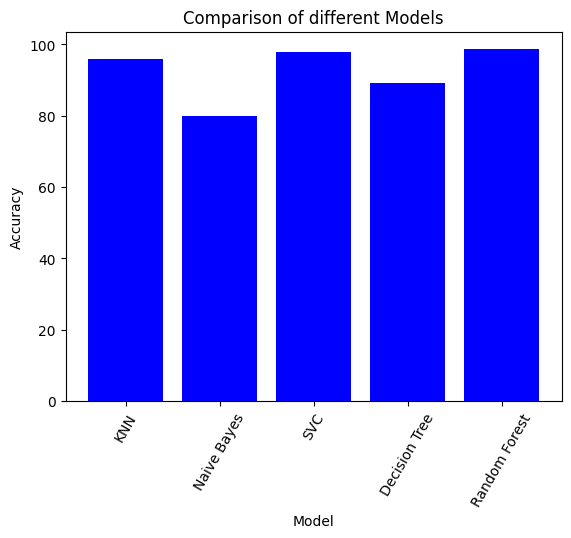

In [213]:
plt.bar(table["Algorithms"],table["Accuracy Score"],color="blue")
plt.xticks(rotation=60)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of different Models")

# **Conclusion**

From the above data visualization we can conclude that SVC is the best model for this Crop recommendation

The Crop Recommendation System leverages machine learning and agricultural data to provide valuable insights into optimizing crop choices for specific land characteristics. By bridging traditional farming practices with cutting-edge technology, this project contributes to the advancement of modern agriculture and offers a practical solution to address the challenges faced by farmers in maximizing their yields and sustainability